In [10]:
# to display plots in notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300  # high res plots
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [11]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [12]:
# use function to extract insitu measurements for a given year from complete NOAA dataset

In [13]:
# inputs for the function
filename = 'co2_kum_surface-flask_426_representative'
year = 2017
# output directory, output format: year + daily + site_code + '.nc'
output_directory = '/geos/u73/msadiq/co2_data/extract/'

In [14]:
def extract_daily(filename = filename,
                  year = year,
                  output_directory = output_directory):
    
    # first and last day of extraction
    first_day = str(year) + '-01-01'
    last_day = str(year+1) + '-01-01'
    
    # 1, open nc file
    directory = '/geos/u73/msadiq/co2_data/obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12_nc/data/nc/'
    ds = xr.open_dataset(directory + filename + '.nc')
    print('reading file: ' + filename)
    
    # 2, read txt file
    directory = '/geos/u73/msadiq/co2_data/obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12_txt/data/txt/'
    txt_read = open(directory+filename+'.txt')
    lines = txt_read.readlines()
    line1 = lines[0].strip() # read the first line, and get header number
    header_nm = int(line1[-3:])
    data = pd.read_csv(directory + filename + '.txt', sep=' ', header =  header_nm -1)
    
    # calculate daily mean with pandas package
    daily_mean = data.groupby(['year','month','day']).mean()
    # plot daily mean CO2 levels for the whole observtion period
    fig = plt.figure(figsize=[8,5])
    plt.plot(daily_mean['time_decimal'], daily_mean['value']*1e6)
    plt.title(ds.attrs['site_name'] + ' CO2')
    plt.ylabel('CO2 (ppmv)')
    
    # slice of data corresponding to the year
    data_year = data[data.year == year]
    if(len(data_year) < 100):
       print('not many observations are available for this year at this site')
       return
    
    # daily mean of that year
    daily_mean = data_year.groupby(['month','day']).mean()
    # add another line to the figure
    plt.plot(daily_mean['time_decimal'], daily_mean['value']*1e6)
    # save the figure
    fig.savefig(output_directory + '/plots/' + ds.attrs['site_code'] + '.png', dpi=300)
    
    # remove that extreme value
    s = daily_mean['value']
    daily_mean['value'] = s.where(s < 0.00048, float('nan')) ### needs better method to remove extreme values, or not remove at all???
    #plt.plot(daily_mean['time_decimal'], daily_mean['value']*1e6)
    
    # for better indexing
    daily_mean.reset_index(inplace = True)
    
    # new dataarray to store daily outputs
    date = np.arange(first_day, last_day, dtype='datetime64[D]')
    daily = xr.DataArray(float('nan'), coords=[date], dims=['date']) 
    
    for iloc in range(len(daily_mean)):
        imonth = int(daily_mean.iloc[iloc].month)
        if(imonth < 10): imonth = '0' + str(imonth)
        iday = int(daily_mean.iloc[iloc].day)
        if(iday < 10): iday = '0' + str(iday)
        date = str(year) + '-' + str(imonth) + '-' + str(iday)

        daily.loc[date] = daily_mean.iloc[iloc].value*1e6 # convert unit to ppmv
    
    # plot daily mean CO2 levels for the year
    fig = plt.figure(figsize=[8,5])
    plt.plot(daily.date, daily, '.')
    plt.title(str(year) + ' ' + ds.attrs['site_name'] + ' CO2')
    plt.ylabel('CO2 (ppmv)')
    fig.savefig(output_directory + '/plots/' + str(year) + '_' + ds.attrs['site_code'] + '.png', dpi=300)

    #daily.plot()
    
    # convert to dataset, netcdf file and add in attributes
    ds_daily = daily.to_dataset(name = 'co2')
    
    attributes = ['site_code', 'site_name', 'site_latitude', 'site_longitude', 'dataset_project', 'site_elevation', 'site_elevation_unit']
    for iattr in attributes:
        ds_daily.attrs[iattr] = ds.attrs[iattr]
    ds_daily.attrs['units'] = 'ppmv'
    
    ds_daily.to_netcdf(output_directory + str(year) + '_daily_' + ds_daily.attrs['site_code'] + '.nc')
    

reading file: co2_kum_surface-flask_426_representative
not many observations are available for this year at this site


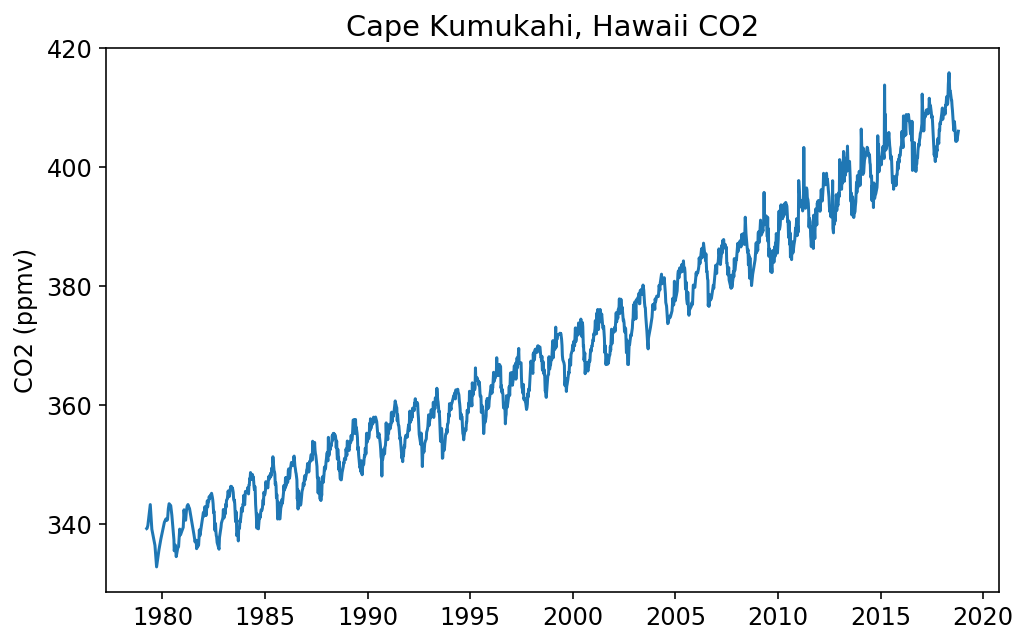

In [15]:
extract_daily(filename = filename,
                 year = year,
                 output_directory = output_directory)

In [16]:
file_dir = '/geos/u73/msadiq/co2_data/obspack_co2_1_GLOBALVIEWplus_v5.0_2019-08-12_nc/data/nc/'
file1 = open(file_dir + 'surface-insitu.filenames', 'r')
lines = file1.readlines()

co2_hdp_surface-insitu_3_nonlocal
reading file: co2_hdp_surface-insitu_3_nonlocal
not many observations are available for this year at this site
co2_gif_surface-insitu_11_allvalid
reading file: co2_gif_surface-insitu_11_allvalid
co2_trn_surface-insitu_442_allvalid-50magl
reading file: co2_trn_surface-insitu_442_allvalid-50magl
co2_acr_surface-insitu_60_allhours
reading file: co2_acr_surface-insitu_60_allhours
not many observations are available for this year at this site
co2_snp_surface-insitu_1_allvalid-5magl
reading file: co2_snp_surface-insitu_1_allvalid-5magl
co2_toh_surface-insitu_442_allvalid-110magl
reading file: co2_toh_surface-insitu_442_allvalid-110magl
co2_inx01_surface-insitu_60_allhours
reading file: co2_inx01_surface-insitu_60_allhours
co2_bir_surface-insitu_56_allvalid
reading file: co2_bir_surface-insitu_56_allvalid
co2_kre_surface-insitu_442_allvalid-10magl
reading file: co2_kre_surface-insitu_442_allvalid-10magl
co2_est_surface-insitu_6_allvalid
reading file: co2_est_

KeyboardInterrupt: 

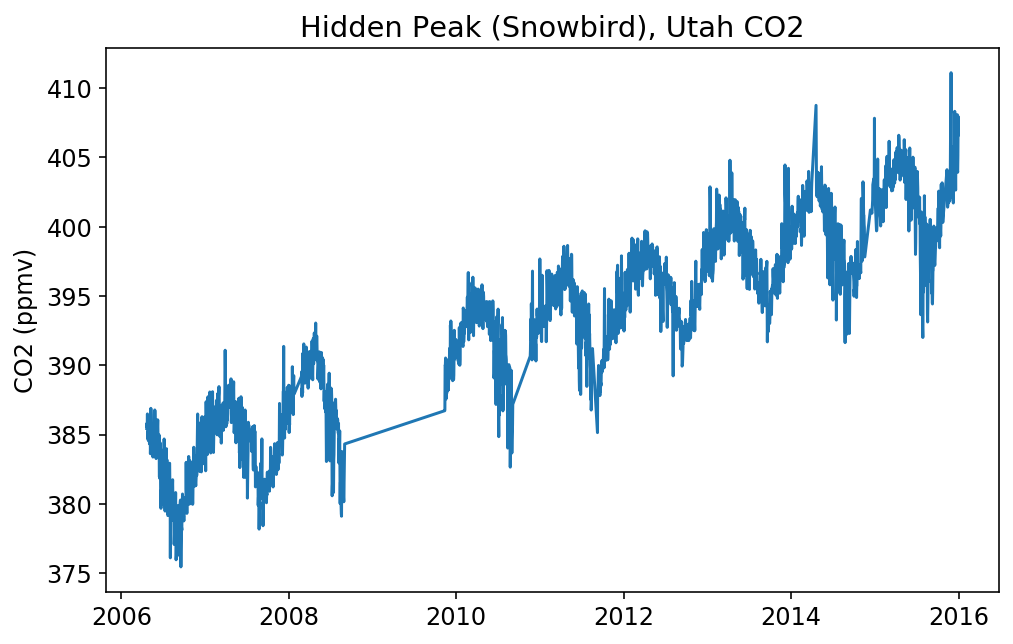

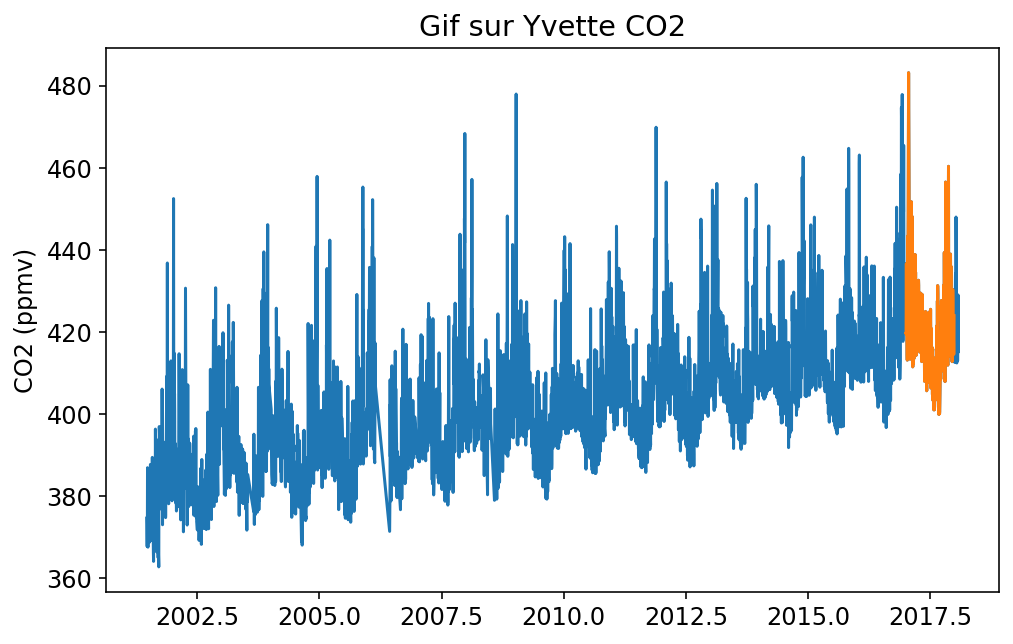

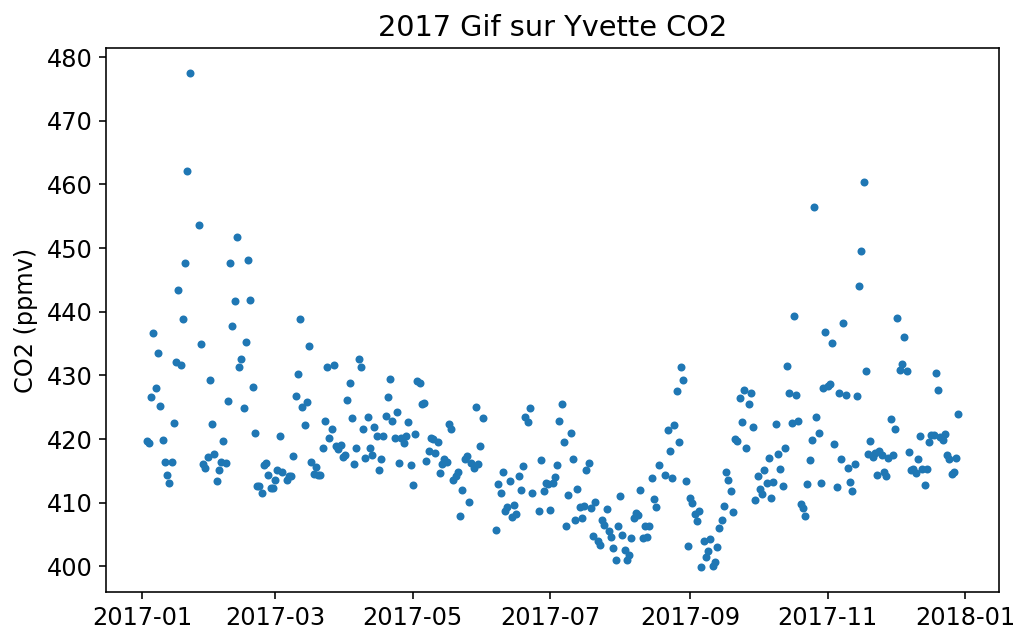

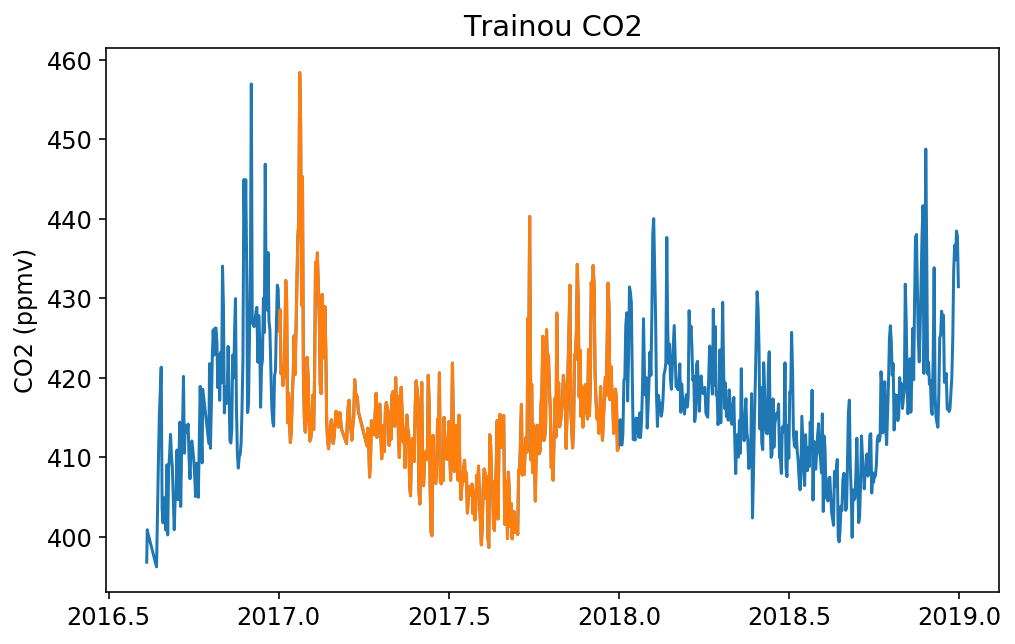

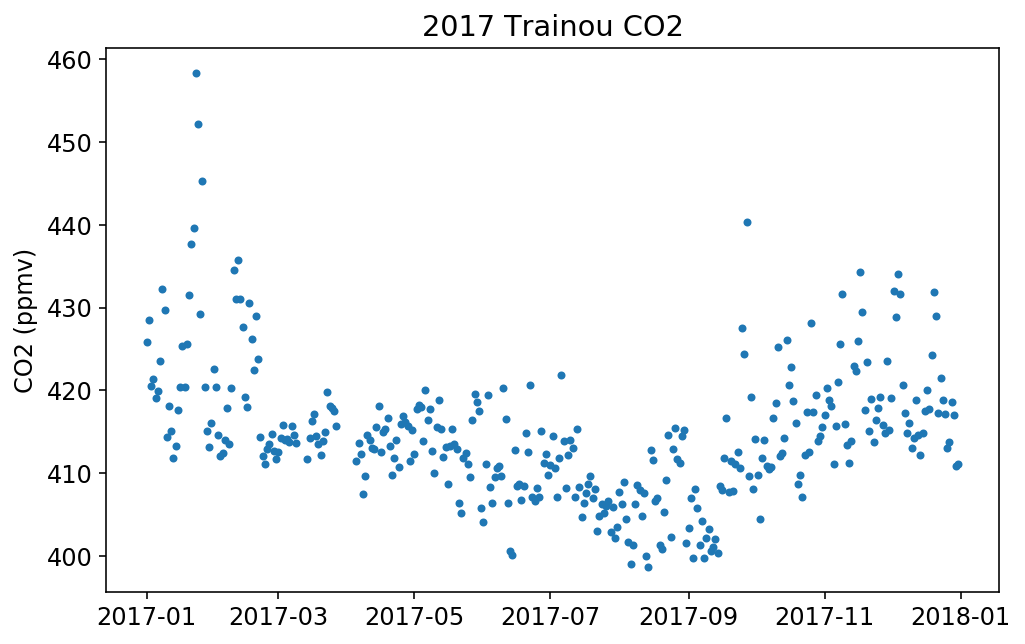

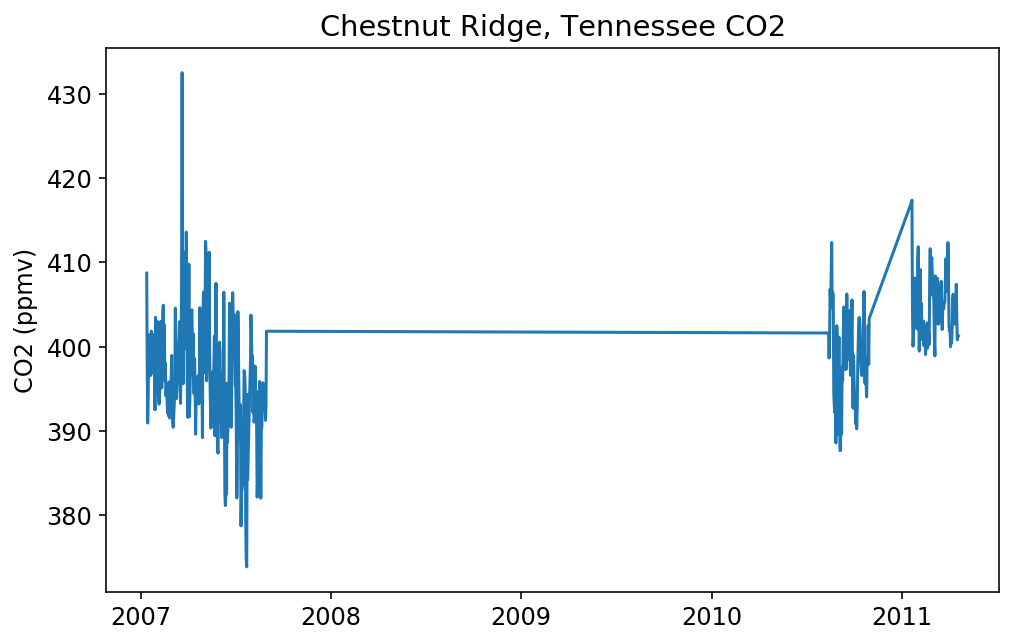

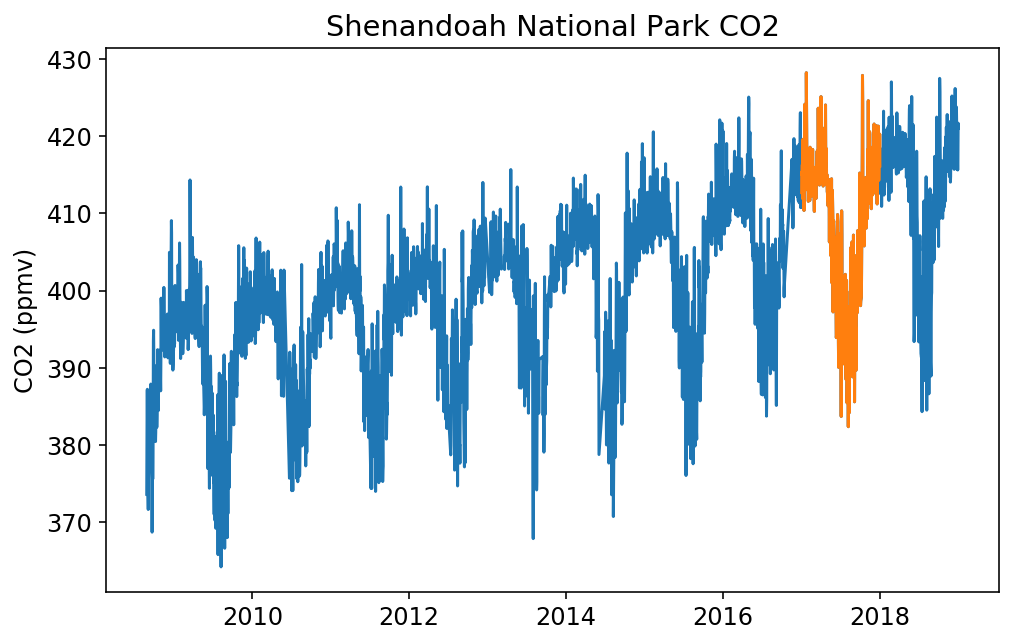

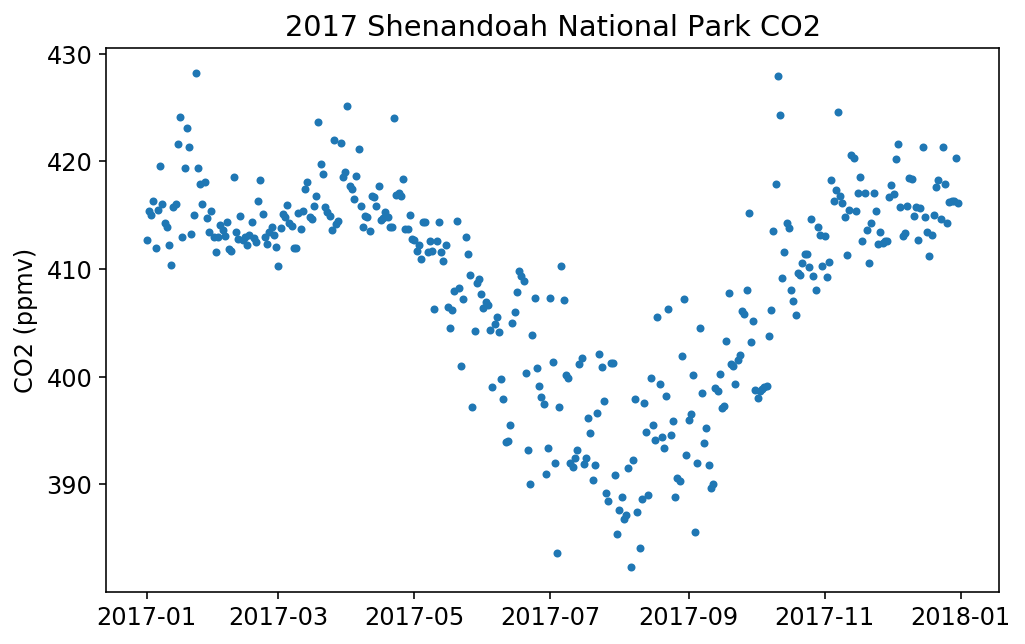

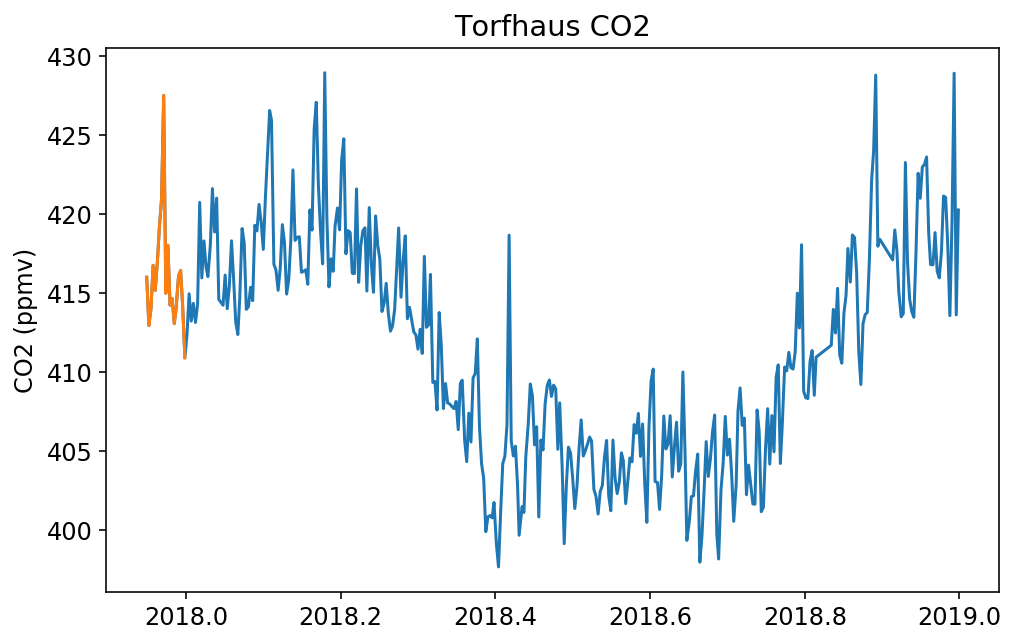

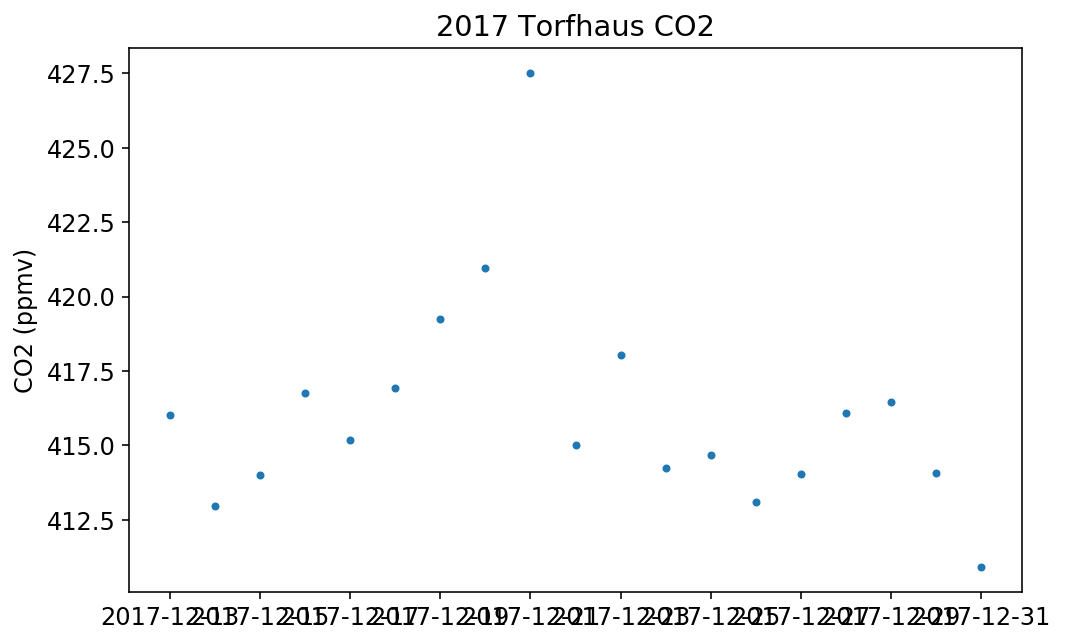

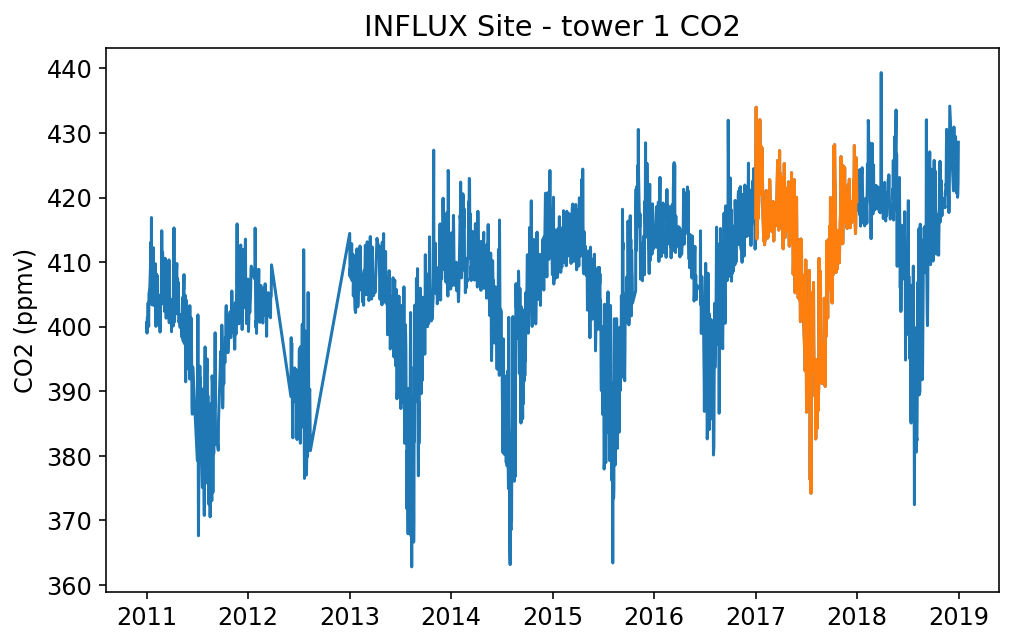

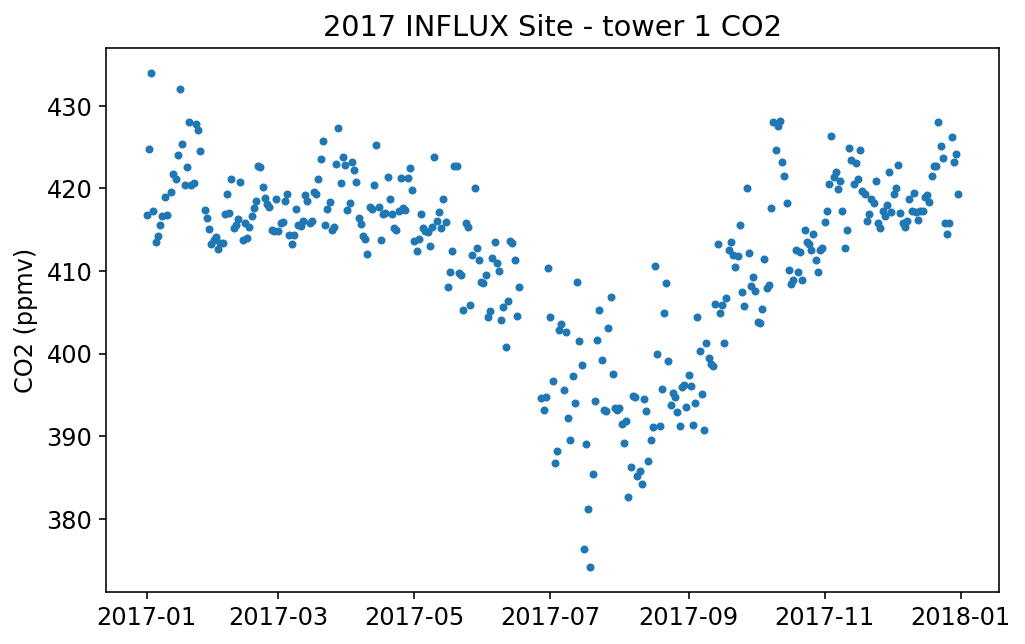

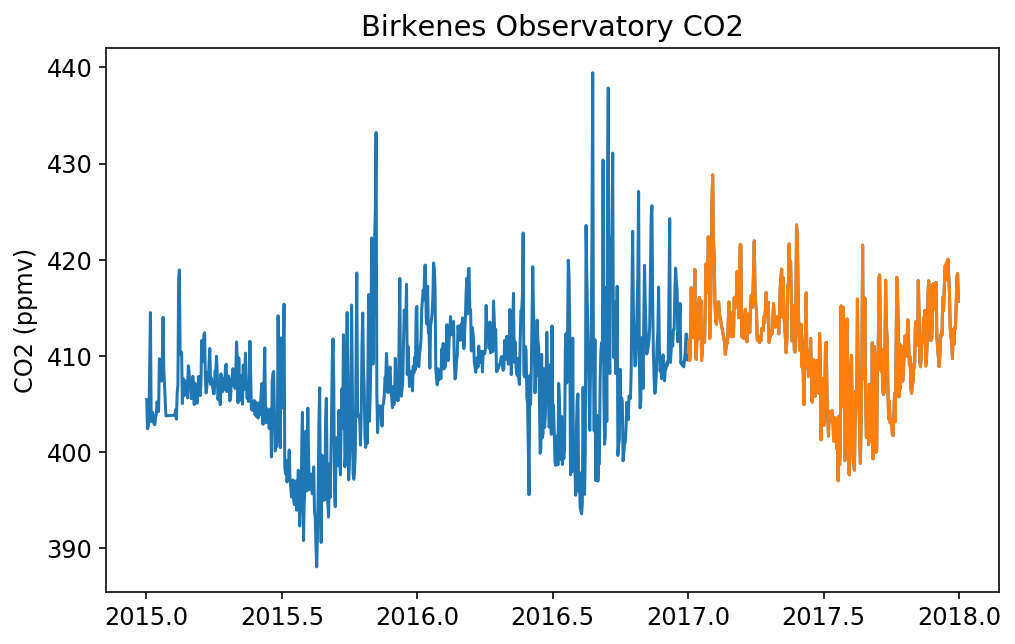

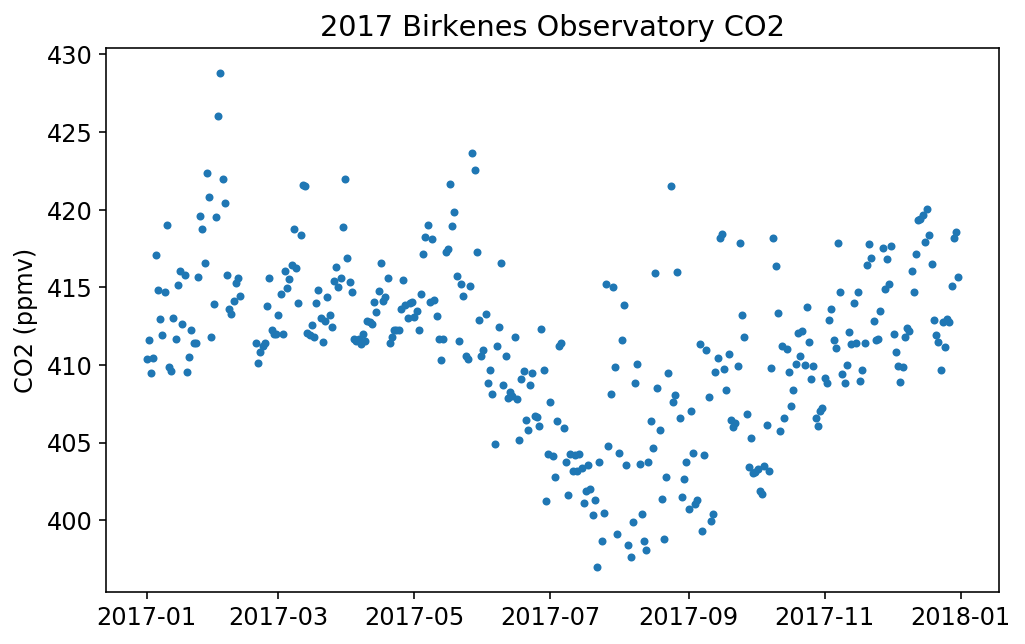

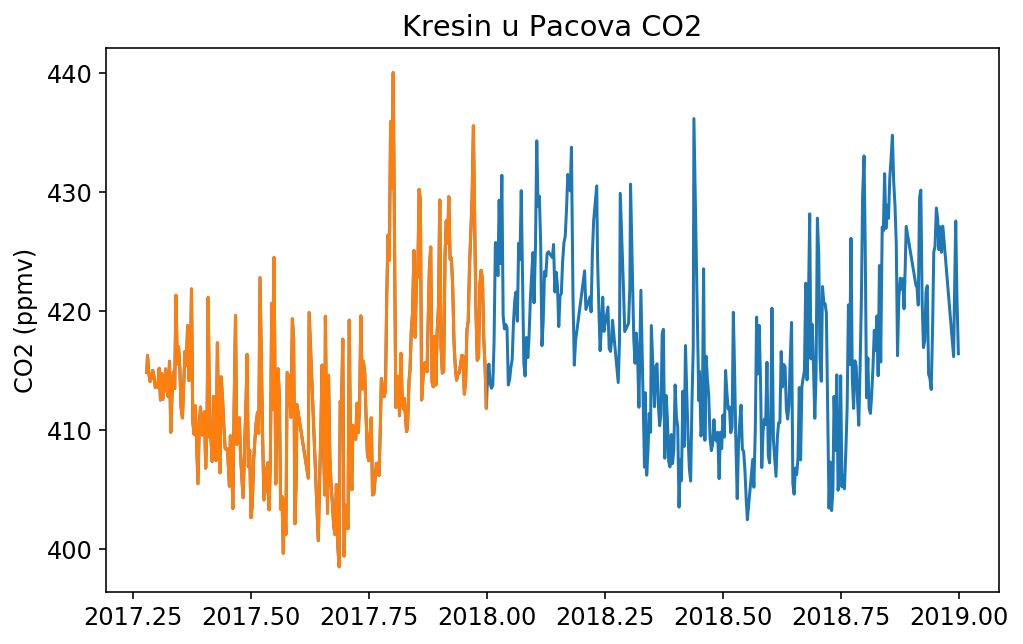

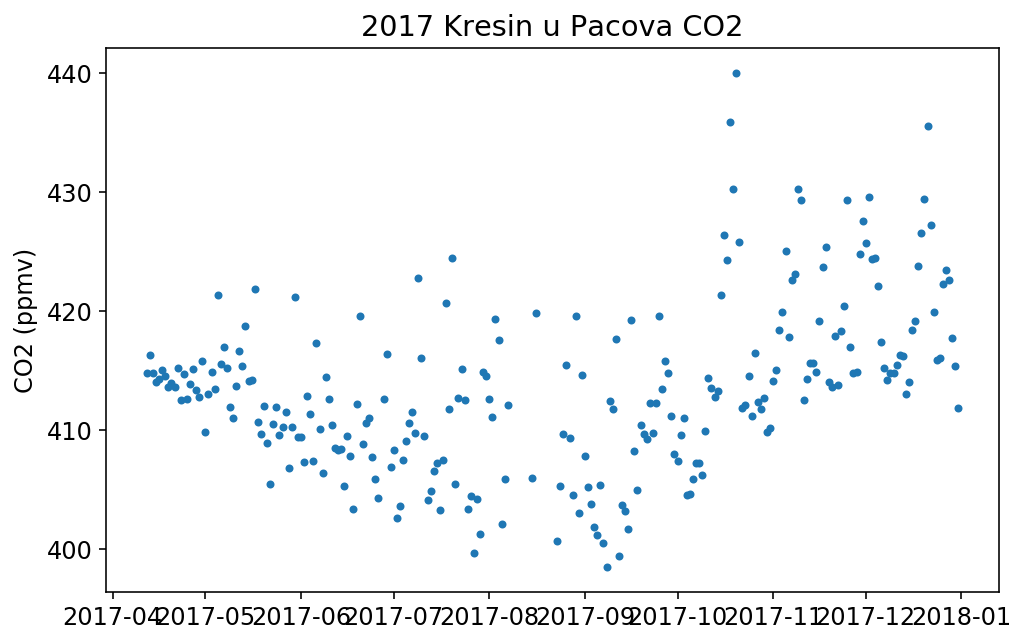

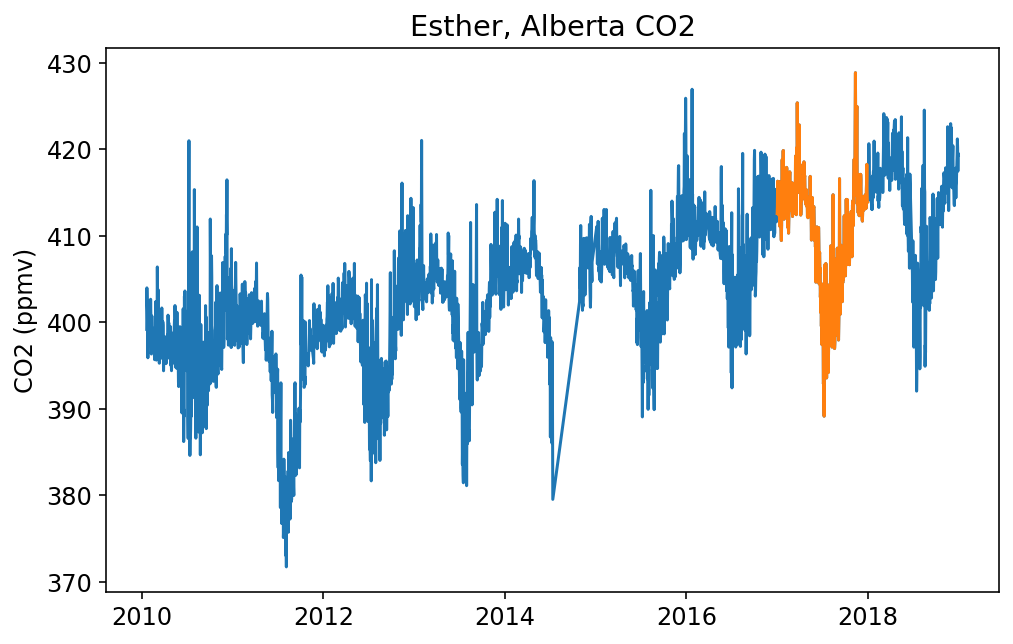

In [17]:
for iline in range(len(lines)):
    line1 = lines[iline].strip()
    line2 = line1[2:]
    filename = line2[:-3]
    
    print(filename)
    extract_daily(filename = filename,
                 year = year,
                 output_directory = output_directory)

In [ ]:
#extract_daily(filename = 'co2_hdp_surface-insitu_3_nonlocal',
#                 year = 2018,
#                 output_directory = output_directory)